In [109]:
#Importing all the necessary packages and libraries
import pandas as pd #data Processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt #visualization 
import seaborn as sb #visualoization
from termcolor import colored as cl #text customization 


from sklearn.model_selection import train_test_split #data split
from sklearn.linear_model import LinearRegression #OLS algorithm 
from sklearn.linear_model import Ridge # Ridge algorithm 
from sklearn.linear_model import Lasso # Lasso algo
from sklearn.linear_model import BayesianRidge #Bayesian algo
from sklearn.linear_model import ElasticNet #ElasticNet algo

from sklearn.metrics import explained_variance_score as evs #EVALUATION MATRIC
from sklearn.metrics import r2_score as r2 #EVALUATION METRIC

sb.set_style('whitegrid') #plot style
plt.rcParams['figure.figsize'] = (20,20) #plot size

#Reading the data file

df = pd.read_csv('Full Monthly Data.csv',encoding='ANSI')

# Data Pre-Processing

In [110]:
#removing the null values 
df.dropna(inplace =True)

print(cl(df.isnull().sum(),attrs=['bold']))

Date                                                                              0
inflation rate                                                                    0
unemployment rate                                                                 0
Value of Private Residential Construction                                         0
Mortgage Interest Rate                                                            0
Percent change of total consumer credit, seasonally adjusted at an annual rate    0
Home Price Index                                                                  0
dtype: int64


In [111]:
#Changing the data types 
df['inflation rate']=df['inflation rate'].str.replace('%','')
df['unemployment rate']=df['unemployment rate'].str.replace('%','')
df['inflation rate'] = df['inflation rate'].astype(np.float64)
df['unemployment rate'] = df['unemployment rate'].astype(np.float64)

In [112]:
#print(cl(df.dtypes, attrs =['bold']))
df['Date']=df["Date"].str.replace('-','')


In [113]:
df['Value of Private Residential Construction'] = df['Value of Private Residential Construction'].astype(np.int64)


In [114]:
#Top 5 rows of our processed data
df.head()

,Date,inflation rate,unemployment rate,Value of Private Residential Construction,Mortgage Interest Rate,"Percent change of total consumer credit, seasonally adjusted at an annual rate",Home Price Index
36,011993,3.26,7.3,194150,7.99,4.77,76.787
37,021993,3.25,7.1,194689,7.68,7.02,76.840
38,031993,3.09,7.0,190185,7.50,-0.59,76.871
39,041993,3.23,7.1,198296,7.46,9.00,76.939
40,051993,3.22,7.1,198835,7.47,0.00,77.040


In [115]:
#Data types of each elements
print(cl(df.dtypes, attrs =['bold']))

Date                                                                               object
inflation rate                                                                    float64
unemployment rate                                                                 float64
Value of Private Residential Construction                                           int64
Mortgage Interest Rate                                                            float64
Percent change of total consumer credit, seasonally adjusted at an annual rate    float64
Home Price Index                                                                  float64
dtype: object


In [116]:
#stastical view of the data 
df.describe()

,inflation rate,unemployment rate,Value of Private Residential Construction,Mortgage Interest Rate,"Percent change of total consumer credit, seasonally adjusted at an annual rate",Home Price Index
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,2.216786,5.835714,388182.744048,5.727976,5.785030,142.414940
std,1.119350,1.791598,132161.326838,1.619957,4.820246,42.785893
min,-2.100000,3.500000,190185.000000,2.680000,-18.340000,76.787000
25%,1.610000,4.600000,261000.000000,4.167500,3.850000,100.376500
50%,2.230000,5.400000,365389.000000,5.865000,5.665000,146.124000
75%,2.905000,6.600000,514249.000000,7.070000,8.082500,176.804500
max,5.600000,14.800000,695675.000000,9.200000,24.810000,235.627000


# Visualization

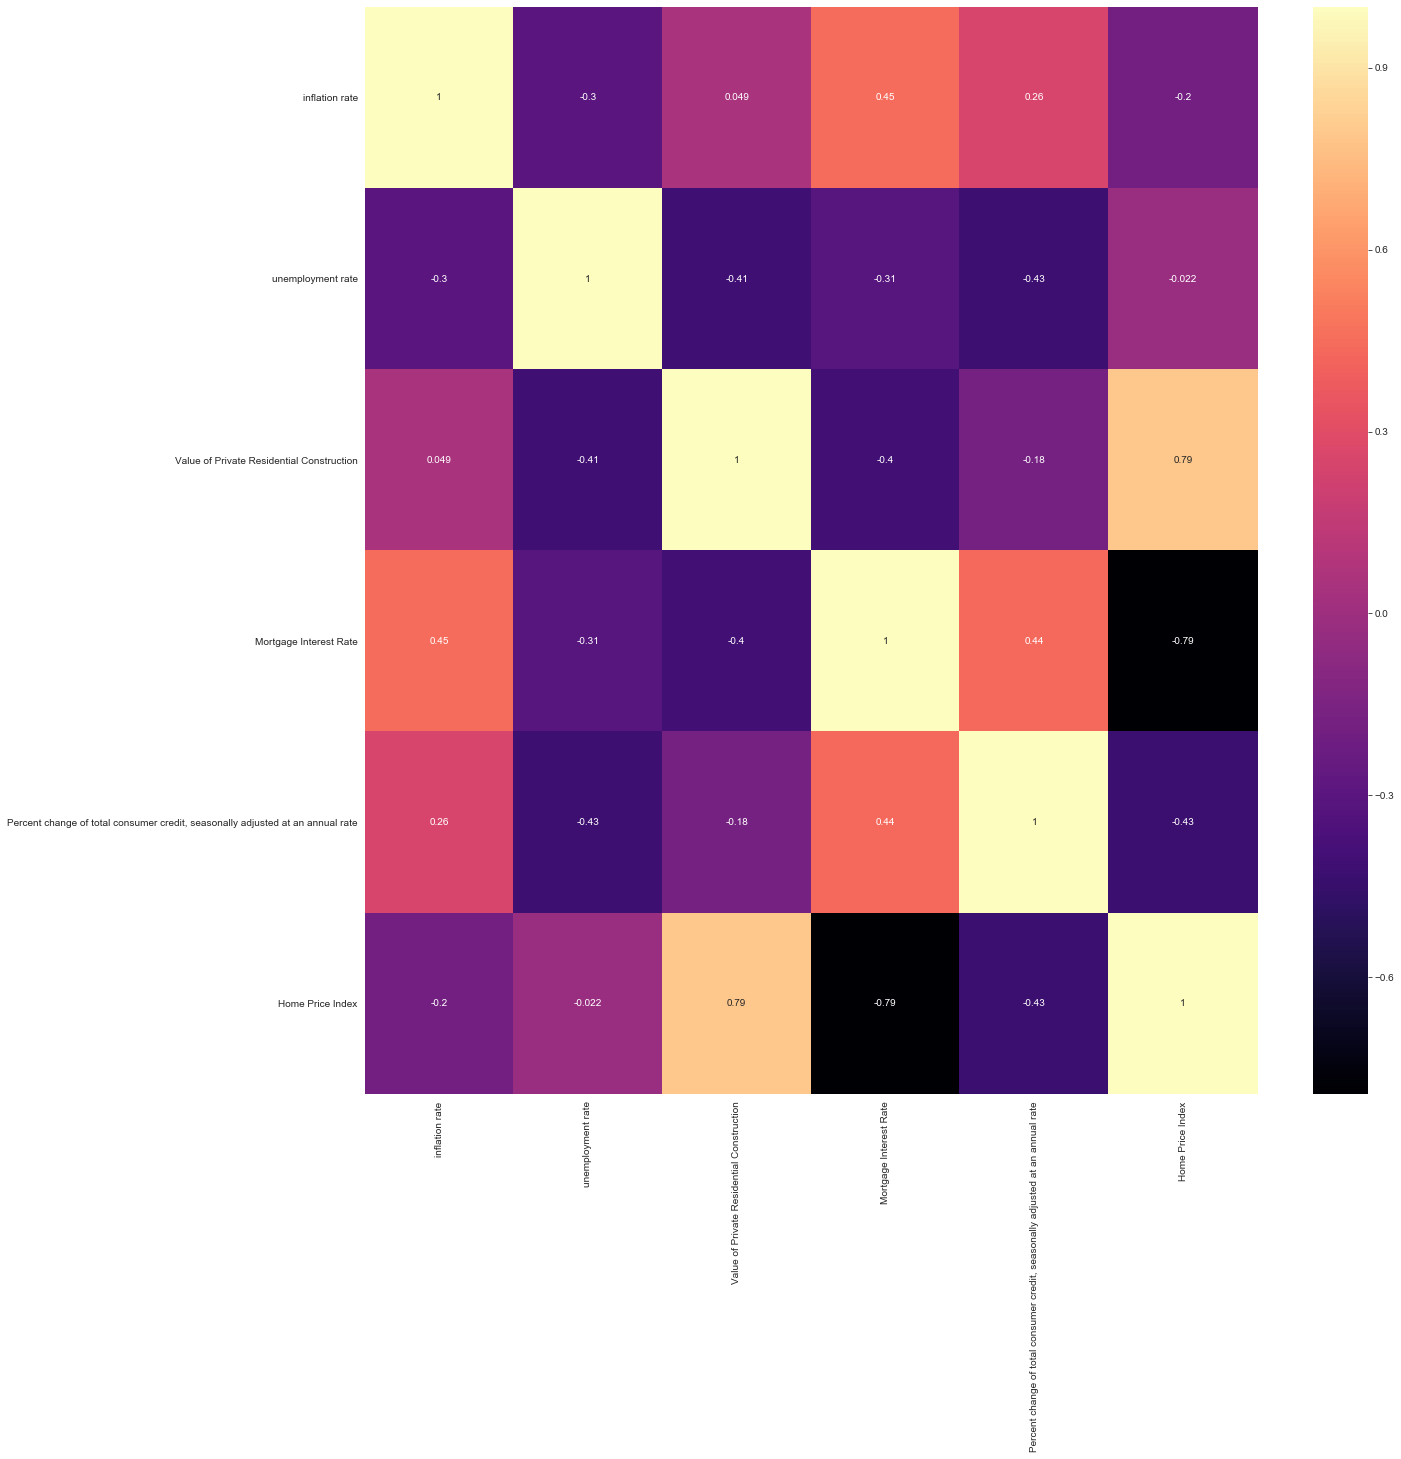

In [117]:
# 1. Heatmap to see the significance between each elements with other elements. 

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

#Shade with yellow means high signnificance and black means low significance

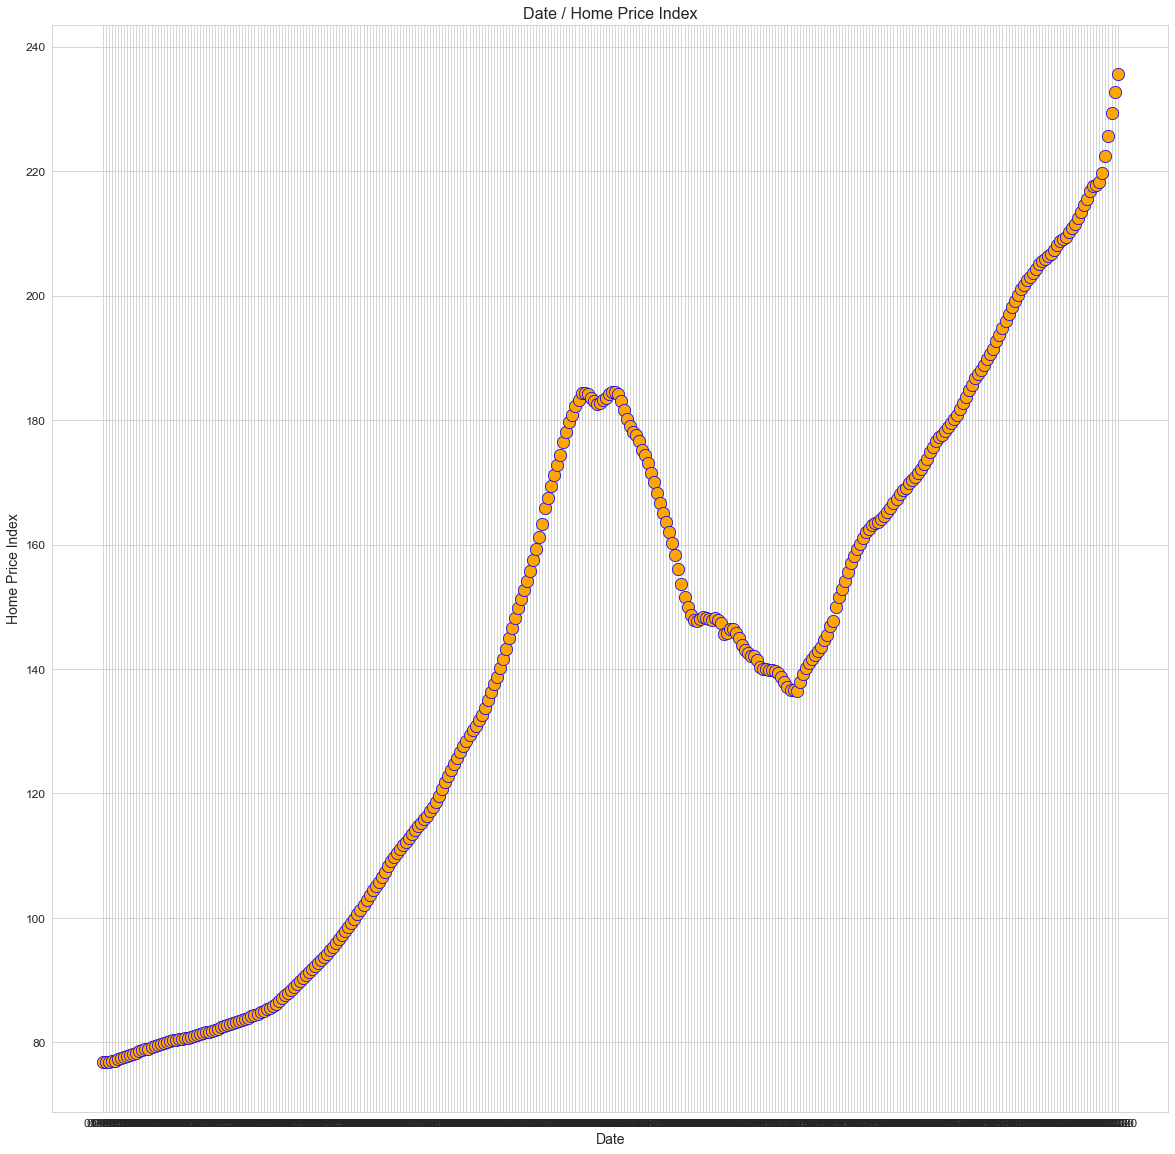

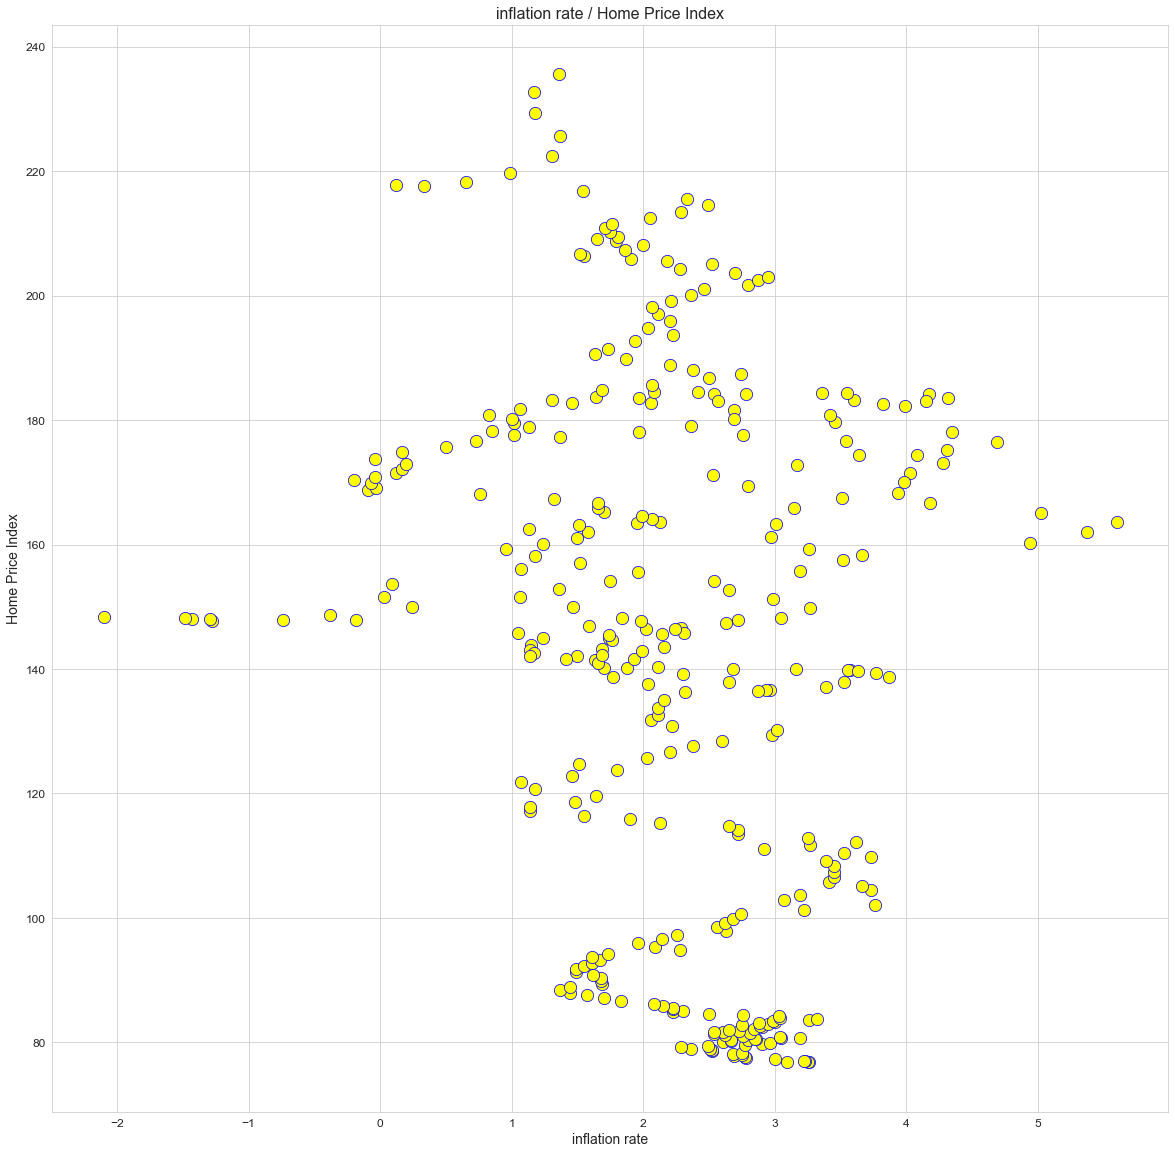

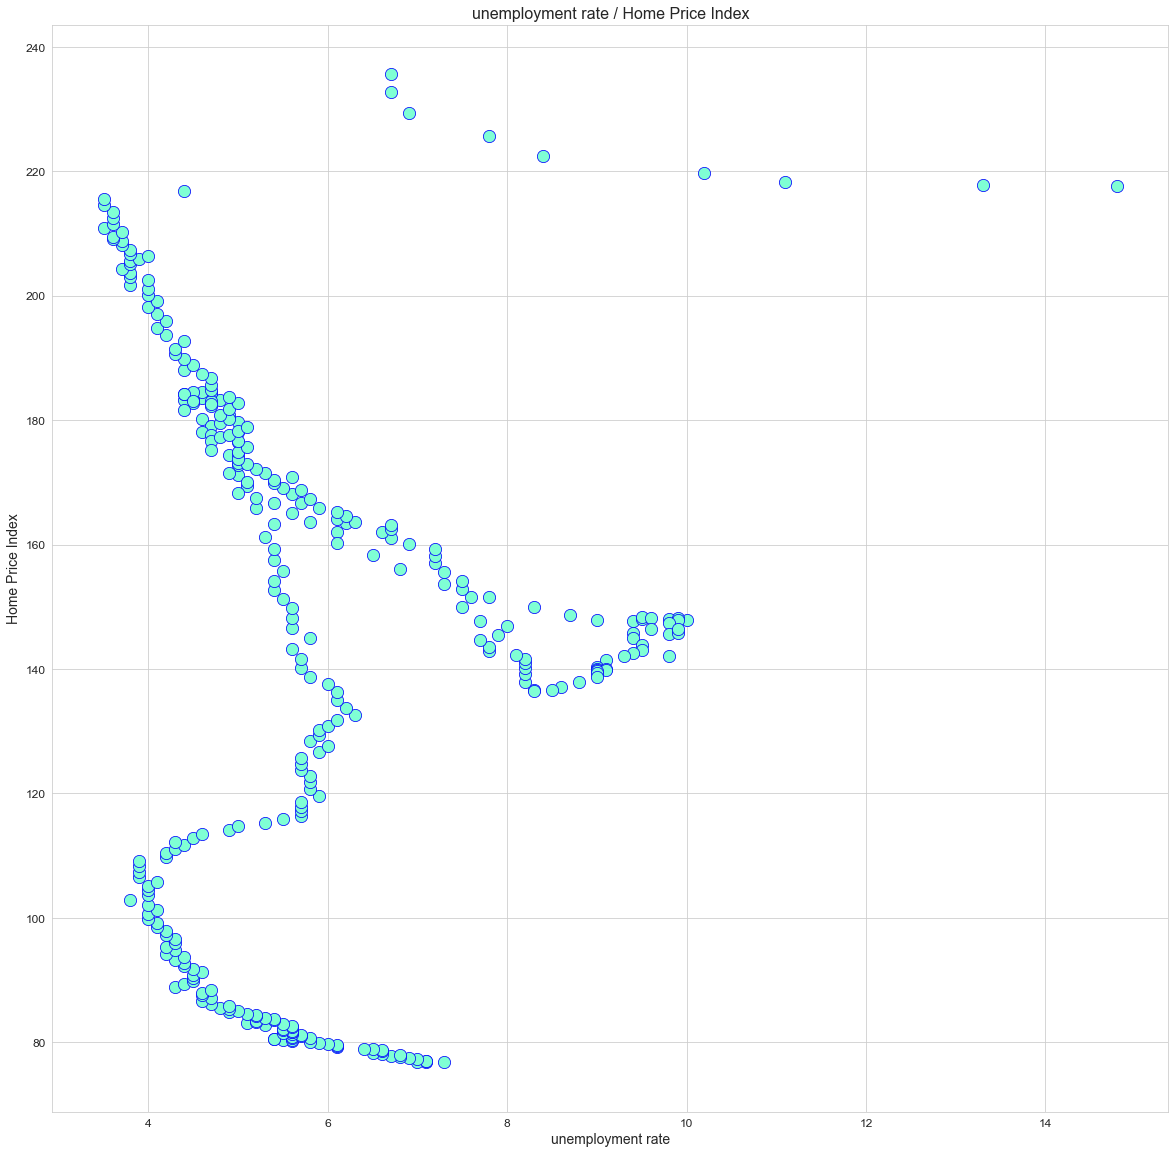

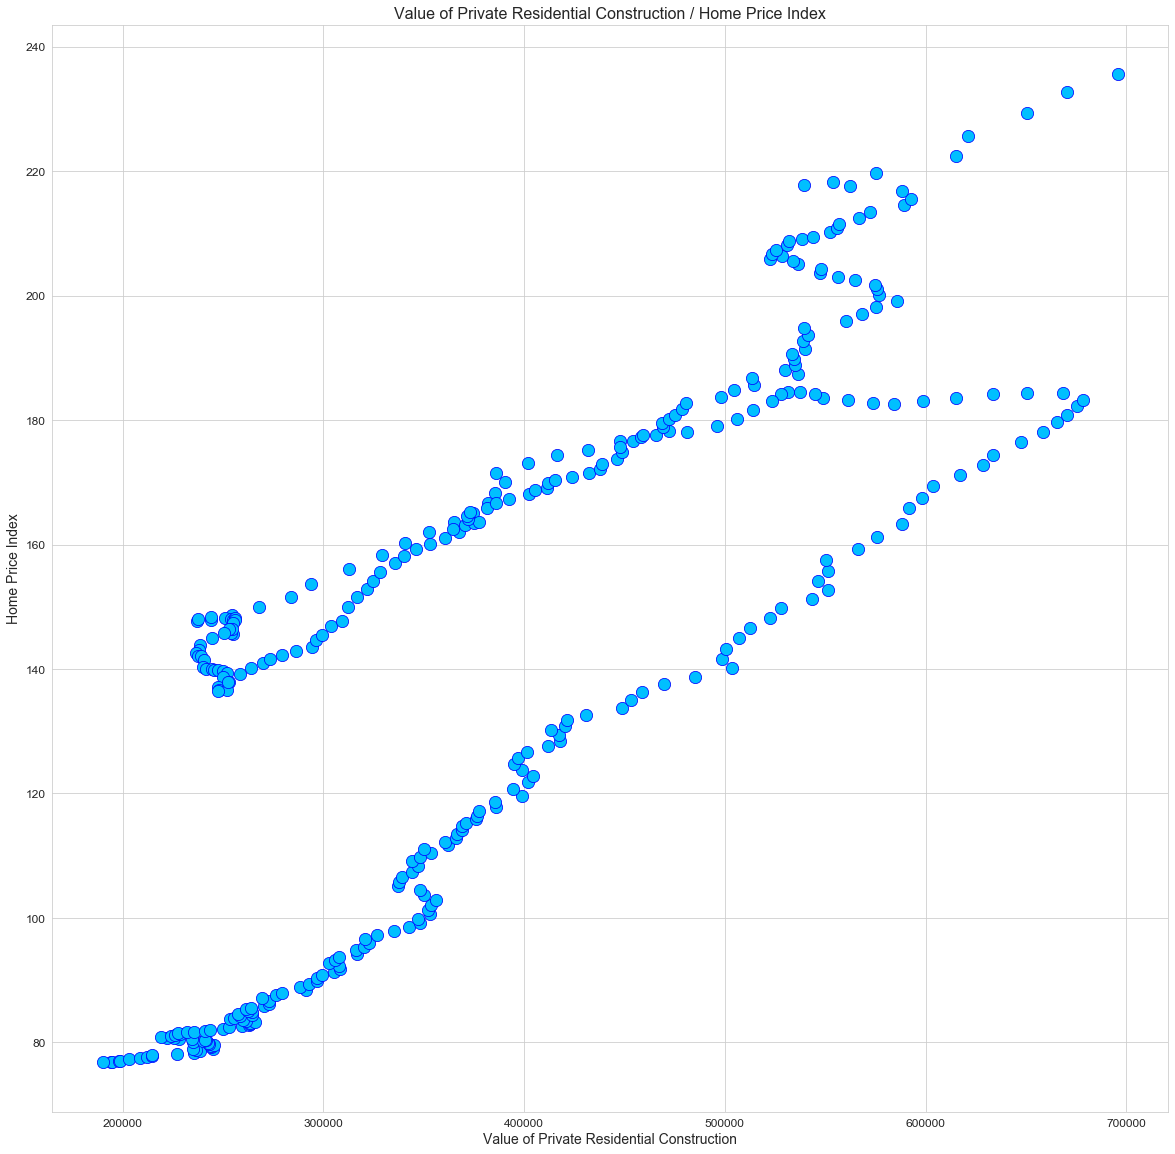

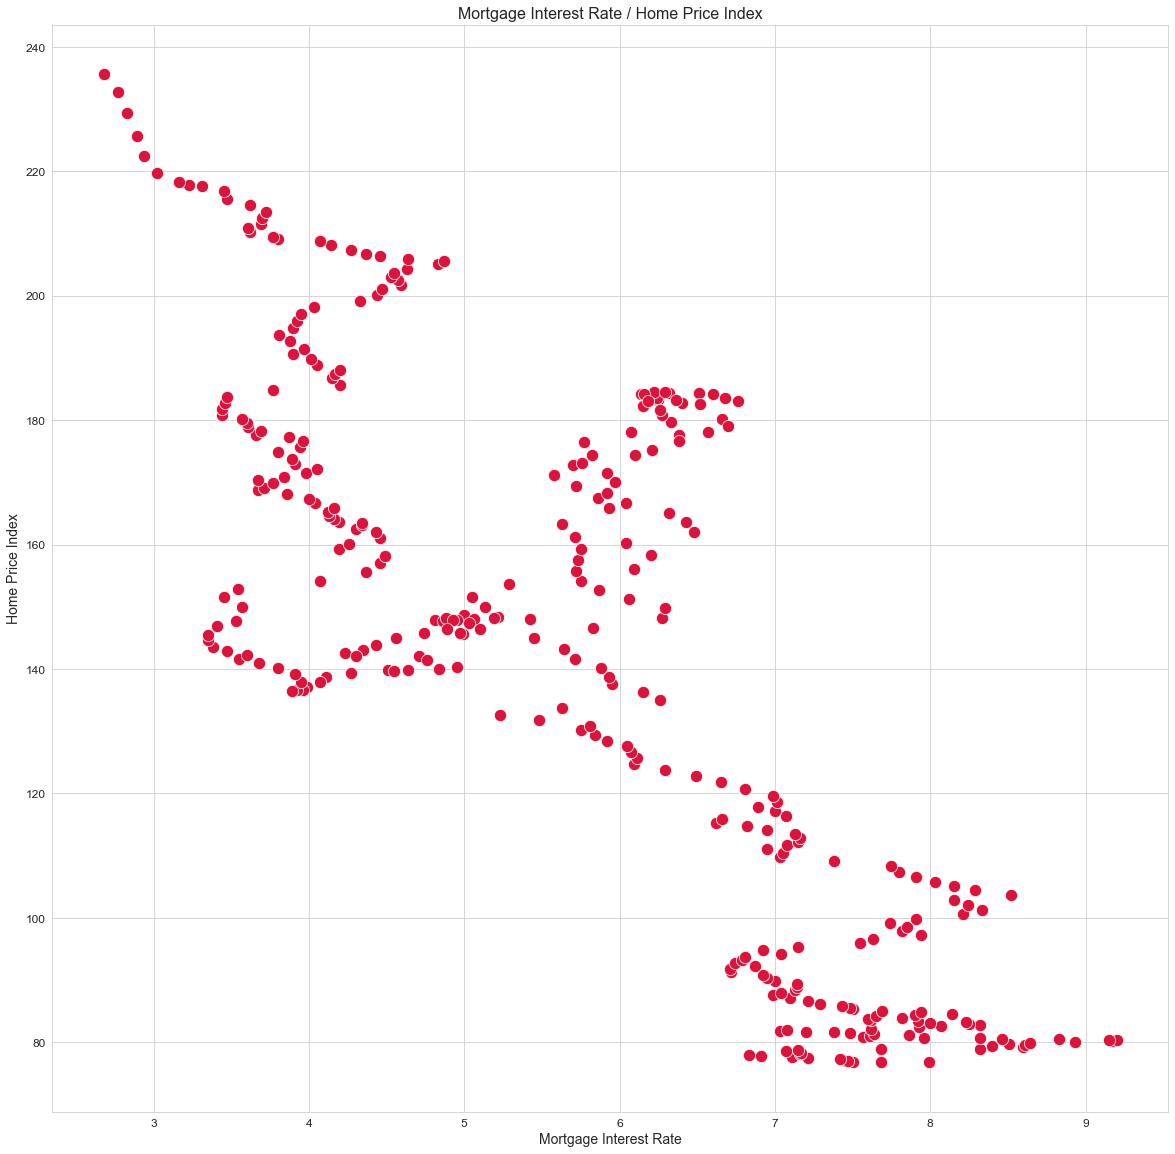

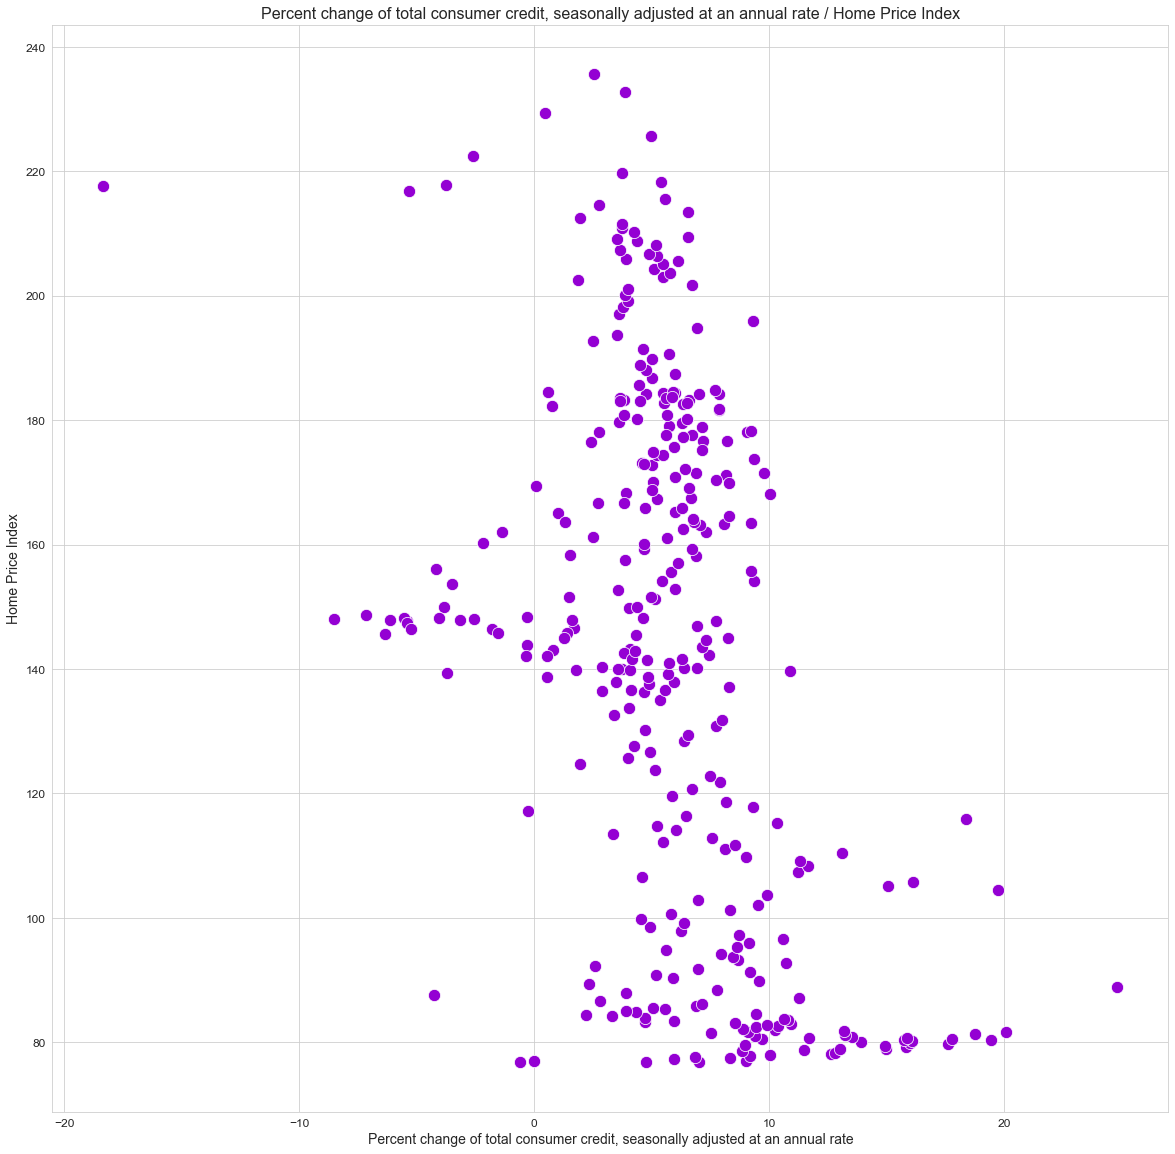

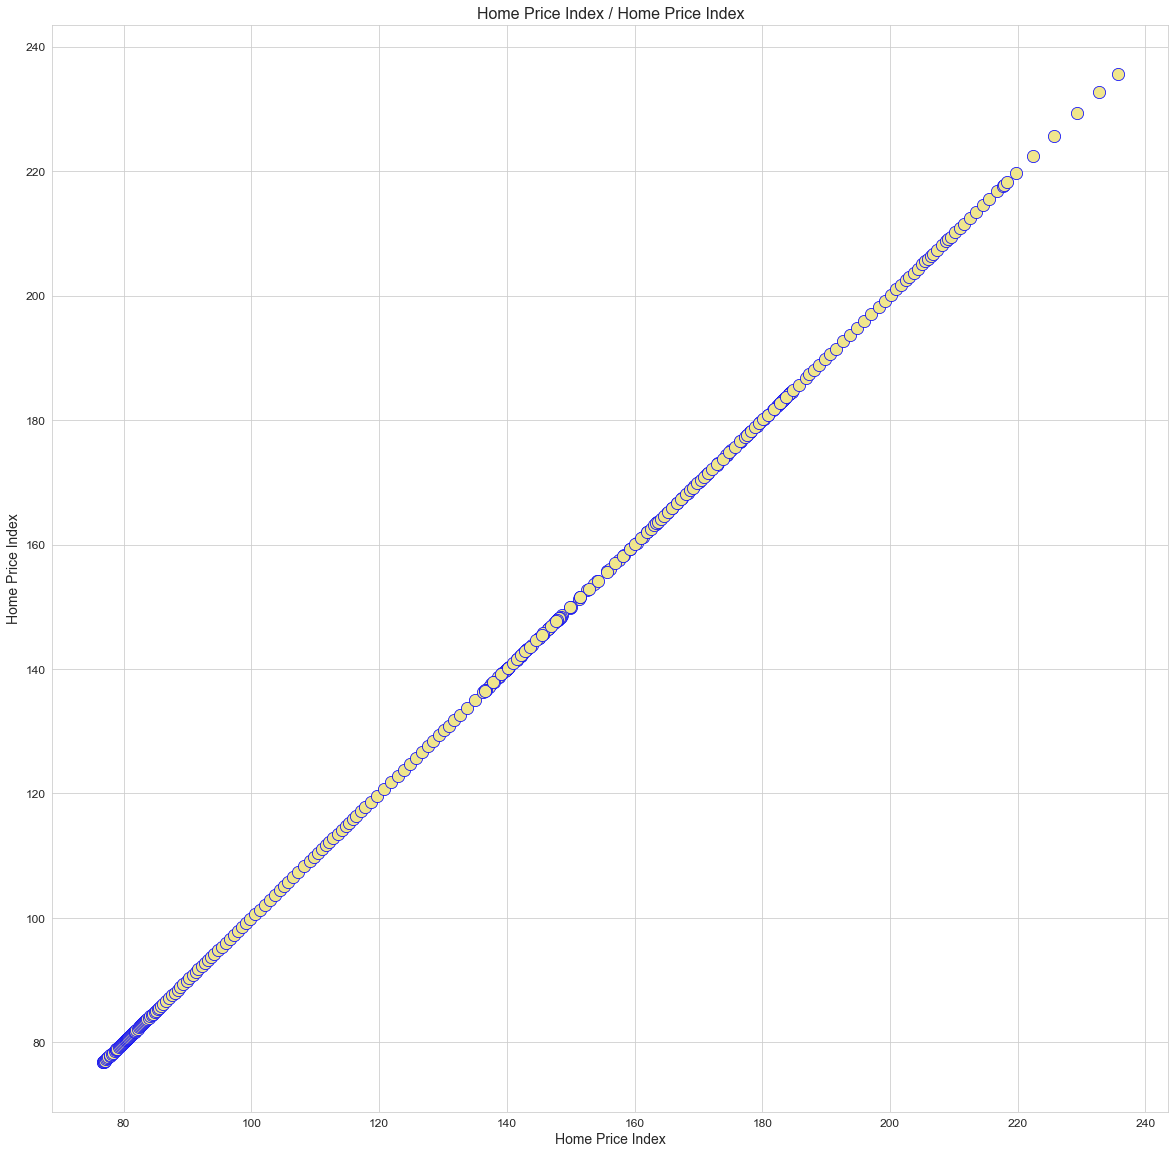

In [118]:
# Scatter Plot
# To observe linear relations between two variables in a dataset

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Home Price Index'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Home Price Index'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(i[6], y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    
    
scatter_df('Home Price Index')

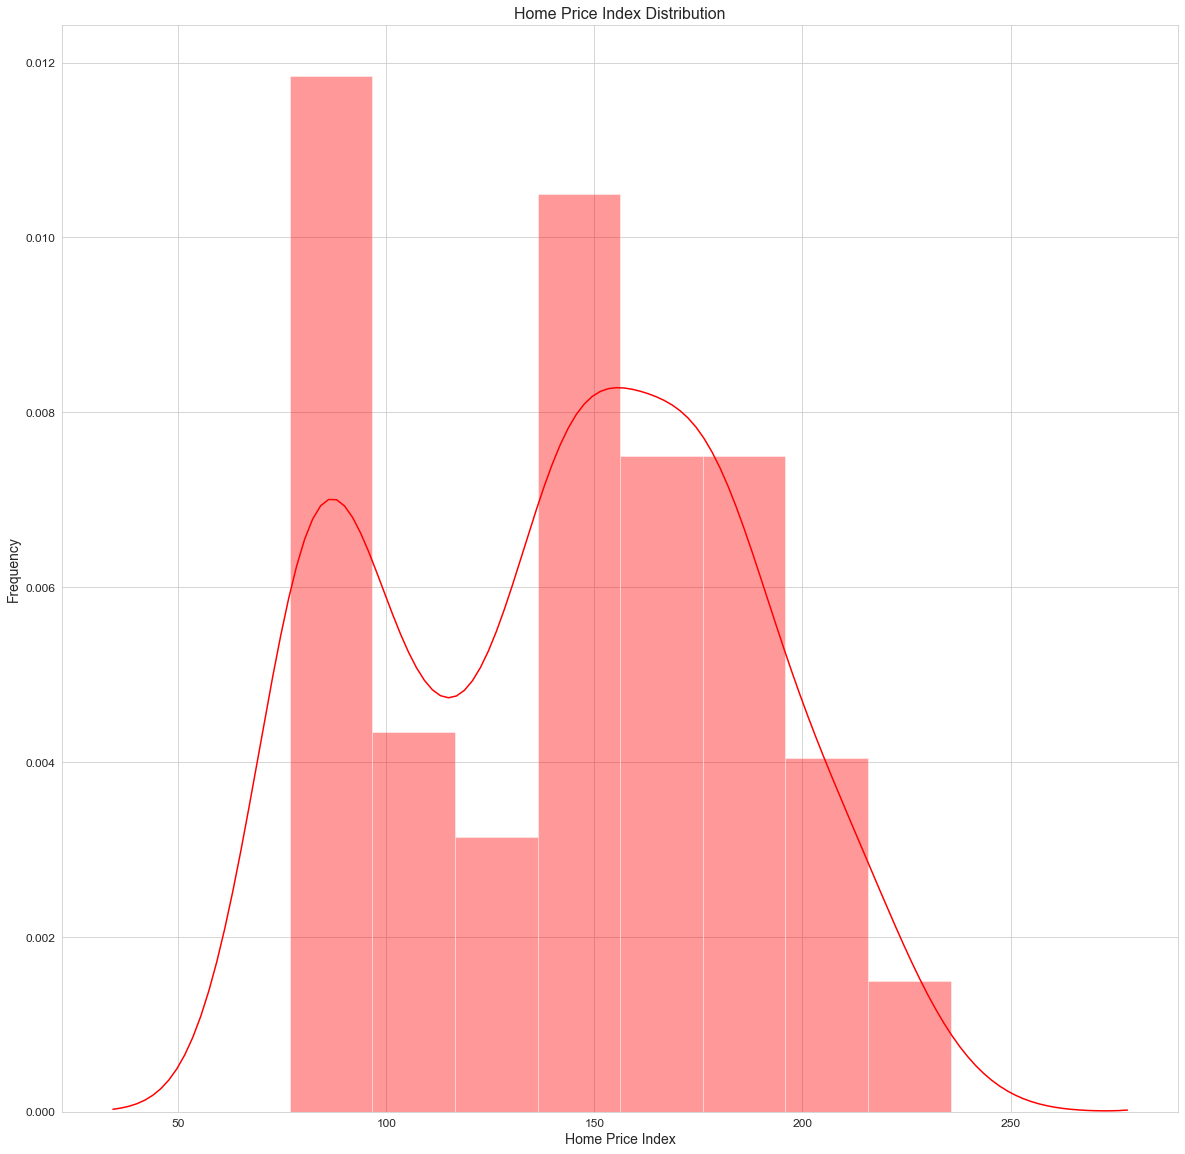

In [119]:
# 3. Distribution plot
# To see how well Home Price Index variable is distributed in the dataset

sb.distplot(df['Home Price Index'], color = 'r')
plt.title('Home Price Index Distribution', fontsize = 16)
plt.xlabel('Home Price Index', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

# Split Data into Test and Train

In [124]:
# FEATURE SELECTION & DATA SPLIT

X_var = df[['Date', 'inflation rate','unemployment rate', 'Value of Private Residential Construction', 'Mortgage Interest Rate', 'Percent change of total consumer credit, seasonally adjusted at an annual rate']].values
y_var = df['Home Price Index'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size= 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:50])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:50])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:50])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:50])



X_train samples :  [['061994' 2.49 6.1 244032 8.4 14.92]
 ['042011' 3.16 9.1 244598 4.84 3.57]
 ['092000' 3.45 3.9 339048 7.91 4.57]
 ['032016' 0.85 5.0 472356 3.69 9.23]
 ['122008' 0.09 7.3 293997 5.29 -3.48]
 ['072005' 3.17 5.0 628750 5.7 5.02]
 ['112004' 3.52 5.4 550392 5.73 3.87]
 ['062006' 4.32 4.6 615053 6.68 3.66]
 ['092013' 1.18 7.2 339977 4.49 6.87]
 ['012007' 2.08 4.6 537571 6.22 0.6]
 ['032018' 2.36 4.0 576915 4.44 3.87]
 ['032006' 3.36 4.7 668311 6.32 5.47]
 ['021993' 3.25 7.1 194689 7.68 7.02]
 ['112015' 0.5 5.1 447590 3.94 5.94]
 ['091993' 2.69 6.7 214446 6.91 9.16]
 ['112011' 3.39 8.6 247279 3.99 8.27]
 ['072015' 0.17 5.2 437549 4.05 6.41]
 ['012003' 2.6 5.8 417788 5.92 6.36]
 ['082014' 1.7 6.1 373163 4.12 6.0]
 ['062012' 1.66 8.2 269664 3.68 5.75]
 ['122006' 2.54 4.4 545011 6.14 7.85]
 ['102012' 2.16 7.8 294197 3.38 7.14]
 ['042020' 0.33 14.8 562339 3.31 -18.34]
 ['061993' 3.0 7.0 203175 7.42 5.93]
 ['101995' 2.81 5.5 227589 7.48 7.5]
 ['042019' 2.0 3.7 530800 4.14 5.19

In [64]:
print(df.columns)

Index(['Date', 'inflation rate', 'unemployment rate',
       'Value of Private Residential Construction', 'Mortgage Interest Rate',
       'Percent change of total consumer credit, seasonally adjusted at an annual rate',
       'Home Price Index'],
      dtype='object')


# Model Creation

In [121]:
# 1. OLS   “OLS” stands for “ordinary least squares” 
# This is a method for approximately determining the unknown parameters located in a linear regression model

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge 
#Ridge regression is one of the types of linear regression in which a small amount of bias is 
#introduced so that we can get better long-term predictions. Ridge regression is a regularization technique,
#which is used to reduce the complexity of the model. It is also called as L2 regularization.

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso 
#Lasso is a regression analysis method that performs both variable selection and 
#regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian
# In this model the parameter estimation amounts to computing posterior
# distributions for these random variables based on the observed data

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet
#In statistics and, in particular, in the fitting of linear or logistic regression models, the elastic net is a regularized 
#regression method that linearly combines the L₁ and L₂ penalties of the lasso and ridge methods.

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

# Evaluating which model is the best


In [122]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.9168997643468838
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.9169266361444259
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.9169854274485263
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.9171315547902521
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.9170121403458041
-------------------------------------------------------------------------------


As per the Variance Score: Bayesian Model has given us the highest accuracy to predict the value of housing index against all the factors. 

In [123]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.9117175795601735
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.9117320297900141
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.9117894301760805
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.9118292360903959
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.9117899682334621
-------------------------------------------------------------------------------


As per the R Squared evaluation: Bayesian Model has given us the highest accuracy to predict the value of housing index against all the factors. 

# # Summary # #
In the above Heat chart we found out that "Value of Construction" is highly significant with the House Price Index. Not only that but with the help of Scatter plot we can see that "Mortgage Interest Rate" and "Unemployment Rate" shows a strong negative relation with the House Price Index and "Value of Construction" is showing strong positive relation with House Price Index. After training our model Bayesian Model is the best model for our data. It will give us the best accuracy of the prediction of House Price Index against all the other factors.